### Optimization via Gradient Descent
In this laboratory session, we want to study methods to solve the general optimization problem where,
given a function $f:R^n \to R$, we want to compute $$ $$
$$ x^∗ = arg \underset{x\in R^n}{\operatorname{min}} f(x) \qquad (1)$$ $$ $$
In particular, we will consider the situation where $f(x)$ is at least differentiable, which implies that we
can compute its gradient $\nabla f(x)$. $$ $$
In this framework, one of the most common way to approach $(1)$ is to use the Gradient Descent (GD) method, which is an iterative algorithm that, given an initial iterate $x_0\in R^n$ and a positive parameter called step size $\alpha _k > 0$ for each iteration, computes $$ $$
$$x_{k+1} = x_k − \alpha _k \nabla f(x_k) \qquad (2)$$ $$ $$
You are asked to implement the GD method $(2)$ in Python and to test it with some remarkable functions. $$ $$
- Write a script that implement the GD algorithm, with the following structure: $$ $$ *Input: $$ $$ $\qquad$ f: the function f(x) we want to optimize. It is supposed to be a Python function, not an array. $$ $$ $\qquad$ grad_f: the gradient of f(x). It is supposed to be a Python function, not an array. $$ $$ $\qquad$ x0: an n-dimensional array which represents the initial iterate. $$ $$ $\qquad$ kmax: an integer. The maximum possible number of iterations (to avoid infinite loops) $$ $$ $\qquad$ tolf: small float. The relative tollerance of the algorithm. Convergence happens if $||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2$ $$ $$ $\qquad$ tolx: small float. The tollerance in the input domain. Convergence happens if $||x_{k} - x_{k-1}||_2 < tolx$. Pay attention to to the first iterate. $$ $$ Output: $$ $$ $\qquad$ x: an array that contains the value of $x_k$ FOR EACH iterate $x_k$ (not only the latter). $$ $$ $\qquad$ k: an integer. The number of iteration needed to converge. $k < kmax$. $$ $$ $\qquad$ f_val: an array that contains the value of $f(x_k)$ FOR EACH iterate x_k. $$ $$ $\qquad$ grads: an array that contains the value of $grad_f(x_k)$ FOR EACH iterate $x_k$. $$ $$ $\qquad$ err: an array the contains the value of $||grad_f(x_k)||_2$ FOR EACH iterate $x_k$.* $$ $$ For the moment, consider a fixed value of α > 0.

- In the **utils** folder for this lesson, you can find a file which is named **backtracking.py** that contains an implementation of the backtracking algorithm for the GD method. That function works as follows: $$ $$ *Input: $$ $$ $\qquad$ f: the function f(x) we want to optimize. It is supposed to be a Python function, not an array. $$ $$ $\qquad$ grad_f: the gradient of f(x). It is supposed to be a Python function, not an array. $$ $$ $\qquad$ x: an array. The actual iterate x_k for which you want to find the correct value for alpha. $$ $$ Output: $$ $$ $\qquad$ alpha: a float. The correct step size for the next iteration.* $$ $$ Modify the code for the GD method to let it be able to use the backtracking algorithm for the choice of the step size.

# Exercise 2 - Gradient method

In [3]:
# Import the libraries (as usual)
import numpy as np
import matplotlib.pyplot as plt

# Import the backtracking file from the folder utils to run the backtracking.
from utils import backtracking

%matplotlib inline


# The gradient_descent implementation.
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, backtrack, alpha = 0.1):

    def cond1(x_0, x_actual, grad_f, tolf):
        return (np.linalg.norm(grad_f(x_actual), 2) < tolf*( np.linalg.norm(grad_f(x_0), 2)))
    def cond2(x_previous, x_actual, tolx):
        return np.linalg.norm(np.linalg.norm(x_actual - x_previous, 2) < tolx)

    # Initialization
    k = 0
    
    x = np.zeros((kmax, np.size(x0)))
    f_val = np.zeros((kmax))
    grads = np.zeros((kmax, np.size(x0)))
    err = np.zeros((kmax))
    
    # Assign the values for the first iteration
    x[k, :] = x0
    f_val[k] = f(x0)
    grads[k, :] = grad_f(x0)
    err[k] = np.linalg.norm(grads[k, :], 2)
    
    # Choose step size
    if (backtrack):
        alpha = backtracking.backtracking(f, grad_f, x[0, :])
        
    # Handle the condition for the first iteration
    x[-1, :] = np.ones((np.size(x[0,:]), ))
    
    # Start the iterations
    while (((not(cond1(x[0,:], x[k,:], grad_f, tolf))) or (not(cond2(x[k-1,:], x[k,:], tolx)))) and (k < kmax-1)):
        # Update the value of x
        x[k+1, :] = x[k, :] - (alpha*grads[k, :])
        
        # Update the step size alpha
        if (backtrack):
            alpha = backtracking.backtracking(f, grad_f, x[k+1, :])
        
        # Update the values the the actual iteration
        k = k+1
        f_val[k] = f(x[k, :])
        grads[k, :] = grad_f(x[k, :])
        err[k] = np.linalg.norm(grads[k, :], 2)
    
    # Truncate the vectors that are (eventually) too long
    f_val = f_val[:k+1]
    grads = grads[:k+1, :]
    err = err[:k+1]
    x = x[:k+1]
    '''
    print("Backtracking: ",backtrack)
    if (not backtrack):
        print("Alpha: ",alpha)
    print("Local minimum found: " + str(x[k]))
    print("Iterations performed: " + str(k))
    print("_________________")
    '''
    
    return x, k, f_val, grads, err


## PLOTTERS

##plotter for 3d representable functions
def plot3d(f, grad, alpha, x_star):
    
    x0 = np.array([0,0])
    kmax = 1000
    tolf = 10**(-7)
    tolx = 10**(-8)

    x_ax = np.linspace(-5, 4, 100)
    y_ax = np.linspace(-6, 6, 100)
    xv, yv = np.meshgrid(x_ax, y_ax)
    z_ax = f1([xv,yv])

    x, k, f_val, grads, err = gradient_descent(f, grad, x0, kmax, tolf, tolx, False, alpha)
    x_back, k_back, f_val_back, grads_back, err_back = gradient_descent(f, grad, x0, kmax, tolf, tolx, True)

    fig, axs = plt.subplots(1, 4,figsize=(15,4))

    fig.suptitle("ALPHA = "+str(alpha)) 

    contours = axs[0].contour(x_ax, y_ax, z_ax)
    axs[0].title.set_text("Gradient method in contour plot")
    axs[0].plot(x[:,0], x[:,1], 'o-', color='r', label="grad no backtracking: "+str(k)+" iter", markersize=3)
    axs[0].legend(loc='upper left')

    axs[1].title.set_text("Grad - Error in 2-norm ")
    axs[1].set_yscale('log')
    axs[1].plot(range(0,k+1),err, label="error no backtracking", markersize=3)
    axs[1].plot(range(0,k_back+1),err_back, label="error backtracking", markersize=3)
    axs[1].legend(loc='upper left')

    contours = axs[2].contour(x_ax, y_ax, z_ax)
    axs[2].title.set_text("Gradient method in contour plot")
    axs[2].plot(x_back[:,0], x_back[:,1], 'o-', color='k', label="grad backtracking: "+str(k_back)+" iter", markersize=3)
    axs[2].legend(loc='upper left')

    # plot error
    
    x_star_vect_back = np.zeros((len(x_back),2))
    x_star_vect_back[:,0] = np.ones((len(x_back),))*x_star[0]
    x_star_vect_back[:,1] = np.ones((len(x_back),))*x_star[1]

    x_diff_back = x_star_vect_back - x_back
    x_diff_back_norm = np.zeros((len(x_back),1))

    x_star_vect = np.zeros((len(x),2))
    x_star_vect[:,0] = np.ones((len(x),))*x_star[0]
    x_star_vect[:,1] = np.ones((len(x),))*x_star[1]

    x_diff = x_star_vect - x
    x_diff_norm = np.zeros((len(x),1))

    for i in range(0, len(x_diff_back)):
        x_diff_back_norm[i] = np.linalg.norm(x_diff_back[i,:])
    for i in range(0, len(x_diff)):
        x_diff_norm[i] = np.linalg.norm(x_diff[i,:])

    axs[3].plot(range(0,k+1),x_diff_norm, markersize=2, label="no backtracking")
    axs[3].plot(range(0,k_back+1),x_diff_back_norm, markersize=2, label="backtracking")
    axs[3].legend(loc='upper left')
    axs[3].title.set_text("Error in 2-norm")
    axs[3].set_yscale("log")

def plot_err(f, grad_f, n, x_star, alpha):
    
    x0 = np.zeros((n,))
    kmax = 100
    tolf = 10**(-7)
    tolx = 10**(-8)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, False, alpha)
    x_back, k_back, f_val_back, grads_back, err_back = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, True)
    
    
    fig, axs = plt.subplots(1, 2,figsize=(10,4))
    
    fig.suptitle("Vandermonde dimension: "+str(n)+ " ALPHA = " + str(alpha))
    axs[0].plot(range(0,k+1),err, label = "no backtracking: "+str(k)+" iterations" )
    axs[0].plot(range(0,k_back+1),err_back, label = "backtracking: "+ str(k_back)+ " iterations")
    axs[0].title.set_text("Grad - Error in 2-norm ")
    axs[0].set_yscale('log')
    axs[0].legend(loc='upper left')
    

    ## norm vector without backtracking
    
    x_star_vect = np.zeros((len(x),len(x_star)))
    
    for i in range(len(x_star)): 
        x_star_vect[:,i] = np.ones((len(x),))*x_star[i]

    x_diff = x_star_vect - x
    x_diff_norm = np.zeros((len(x),1))

    for i in range(0, len(x_diff)):
        x_diff_norm[i] = np.linalg.norm(x_diff[i,:])
        
    ## norm vector with backtracking
    
    x_star_vect_back = np.zeros((len(x_back),len(x_star))) 
        
    for i in range(len(x_star)): 
        x_star_vect_back[:,i] = np.ones((len(x_back),))*x_star[i]
    
    x_diff_back = x_star_vect_back - x_back
    x_diff_norm_back = np.zeros((len(x_back),1))

    for i in range(0, len(x_diff_back)):
        x_diff_norm_back[i] = np.linalg.norm(x_diff_back[i,:])


    axs[1].plot(range(0,k+1),x_diff_norm, markersize=2, label="no backtracking")
    axs[1].plot(range(0,k_back+1),x_diff_norm_back, markersize=2, label="backtracking")
    axs[1].legend(loc='upper left')
    axs[1].title.set_text("Error in 2-norm")
    axs[1].set_yscale("log")
    plt.show()
    

- Test the algorithm above on the following functions: $$ $$
    1. $f:R^2 \to R$ such that $$f(x_1,x_2)=(x_1-3)^2+(x_2-1)^2$$ for which the true optimum is $x^*=(3,1)^T$. $$ $$


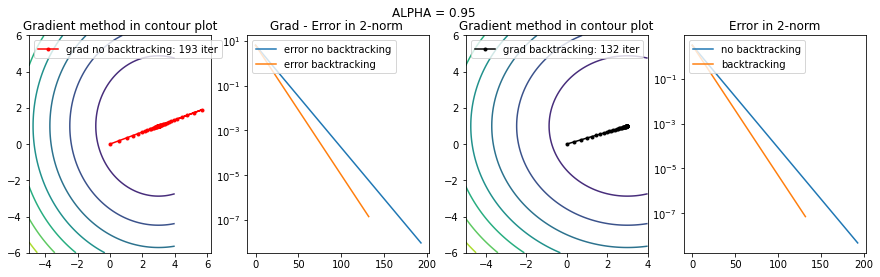

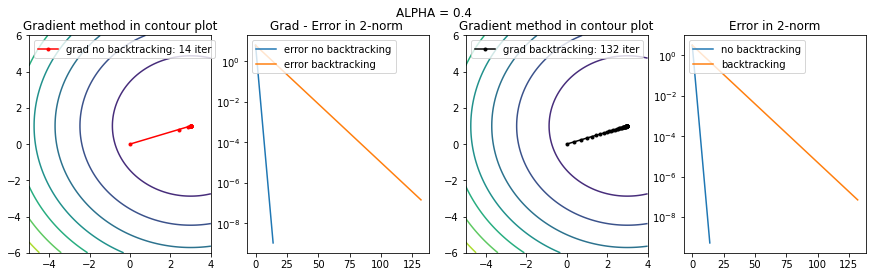

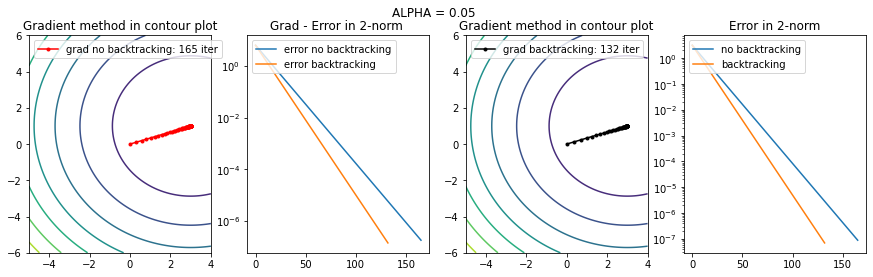

In [4]:
#%% Function 1
def f1(x):
    return (x[0]-3)**2 + (x[1]-1)**2


def grad_f1(x):
    return np.array([(2*x[0]-6), (2*x[1]-2)])


x_star = [3,1]

## plotting with ALPHA = 0.95 

plot3d(f1, grad_f1, 0.95, x_star)

## plotting with ALPHA = 0.4 

plot3d(f1, grad_f1, 0.4, x_star)

## plotting with ALPHA = 0.05 

plot3d(f1, grad_f1, 0.05, x_star)



$\alpha = 0.95 $: We can notice that if we choose a big alpha we are not guaranteed to reach te solution faster, because there can be oscillation or $\alpha$ can be choosen in a smarter way

$\alpha = 0.4 $: If we guess the right value for $\alpha$, instead, we can fastly converge to the true solution

$\alpha = 0.05 $: Choosing $\alpha$ too small can lead us to a slow convergence

$$ $$
    2. $f:R^2 \to R$ such that $$f(x_1,x_2)=10(x_1-1)^2+(x_2-2)^2$$ for which the true optimum is $x^*=(1,2)^T$. $$ $$


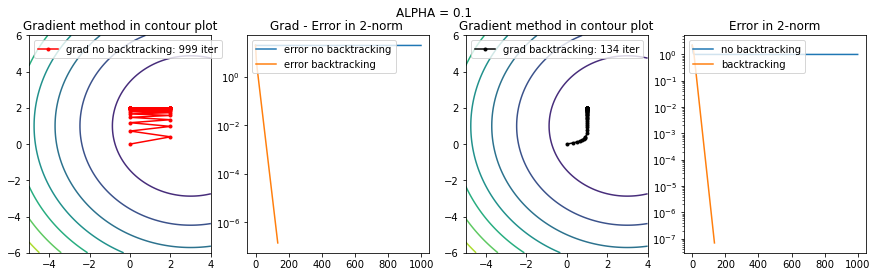

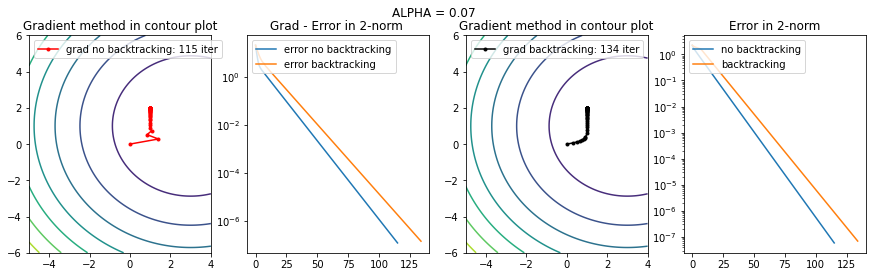

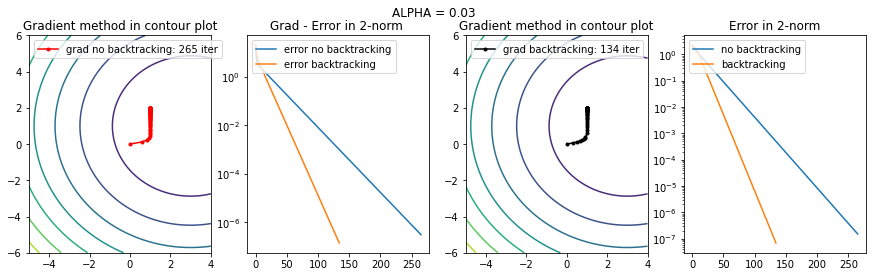

In [5]:

#%% Function 2
def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2


def grad_f2(x):
    return np.array([(20*x[0]-20), (2*x[1]-4)])


x_star = [1,2]

## plotting with ALPHA = 0.1 

plot3d(f2, grad_f2, 0.1, x_star)

## plotting with ALPHA = 0.07

plot3d(f2, grad_f2, 0.07, x_star)

## plotting with ALPHA = 0.03 

plot3d(f2, grad_f2, 0.03, x_star)


**There's no magic bullet for the choice of alpha**
***
$\alpha = 0.1 $: We can notice that if we choose a big alpha we are not guaranteed to reach te solution faster, because there can be oscillation or just because $\alpha$ is choosen in a smarter way. With respect to the previous example, in this case we can notice an infinite oscillation that keeps the calculated solution away from a certain distance to the desired solution.  

$\alpha = 0.07 $: If we guess the right value for $\alpha$, instead, we can converge faster to the true solution

$\alpha = 0.03 $: Choosing $\alpha$ too small can lead us to a slow convergence, as shown in the previous example
***

 $$ $$
    3. $f:R^n \to R$ such that $$f(x)=\frac{1}{2}\|Ax-b\|_2^2$$ where $A\in R^{n×n}$ is the Vandermonde matrix associated with the vector $v\in R^n$ that contains $n$ equispaced values in the interval $[0, 1]$, and $b\in R^n$ is computed by first setting $x_{true}=(1,1,...,1)^T$ and then $b=Ax_{true}$. Try for different values of $n (e.g. n=5,10,15,...)$. 
 $$ $$


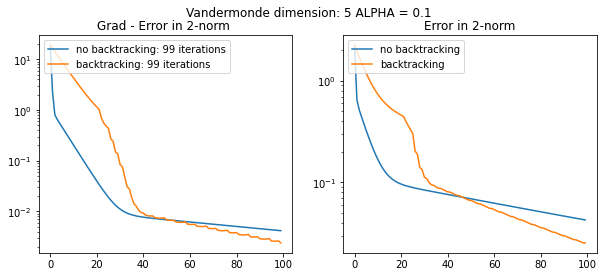

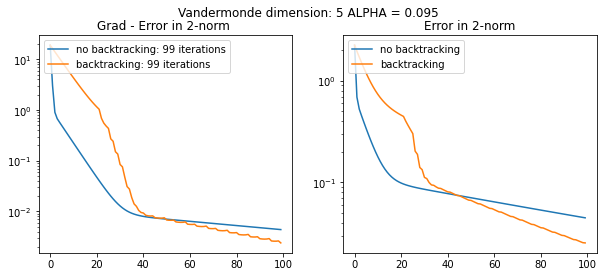

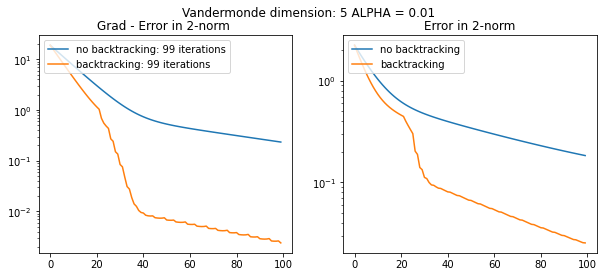

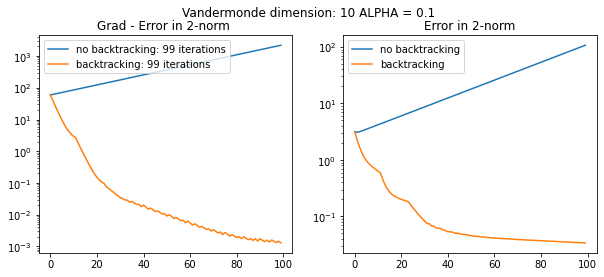

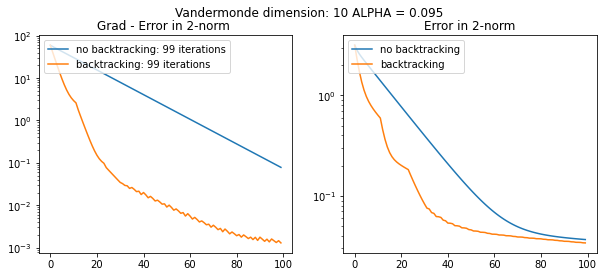

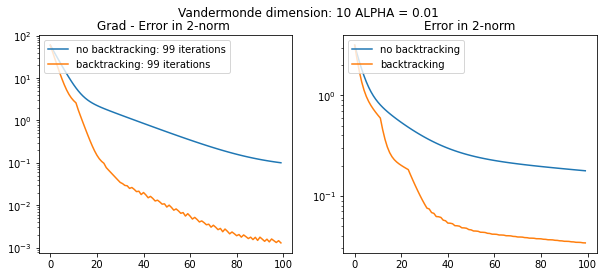

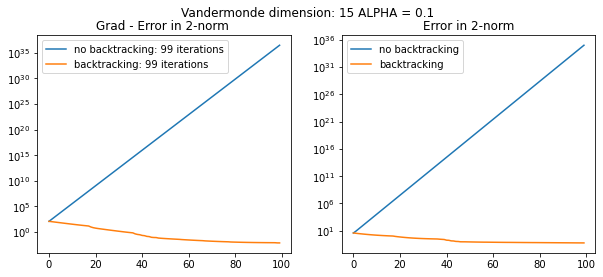

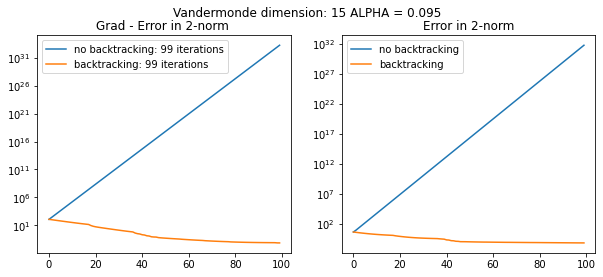

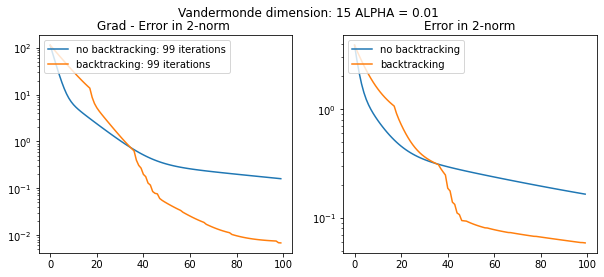

In [9]:

#%% Function 3

n=5 #vandermonde dim
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true

def f3(x):

    return 0.5*(np.linalg.norm((A@x)-b, 2)**2)


def grad_f3(x):
    return (x.T @ A.T - b.T) @ A

plot_err(f3, grad_f3, n, x_true, 0.1)
plot_err(f3, grad_f3, n, x_true, 0.0950)
plot_err(f3, grad_f3, n, x_true, 0.01)

n=10 #vandermonde dim
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true

plot_err(f3, grad_f3, n, x_true, 0.1)
plot_err(f3, grad_f3, n, x_true, 0.0950)
plot_err(f3, grad_f3, n, x_true, 0.01)

n=15 #vandermonde dim
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true

plot_err(f3, grad_f3, n, x_true, 0.1)
plot_err(f3, grad_f3, n, x_true, 0.0950)
plot_err(f3, grad_f3, n, x_true, 0.01)

***
In this case it is difficult to find a good fixed parameter for $\alpha$, and we can notice that if we set it too big ($\alpha = 0.1$) the calculated solution has a huge divergence from $x_{true}$ (especially when the dimension of the matrix is higher than 10x10). We can even notice that the difference between the two gradients (with and without backtracking) increases a lot when we use $\alpha$ values near to the divergence bound for itself. 
*** 

We can even see that increasing the size of the Vandermonde matrix the convergence becomes a lot worse (up to the point of becoming divergence with big $\alpha$), this is because (as we know from ex. 1), Vandermonde matrixes are ill-conditioned. 

$$ $$
    4. $f:R^n \to R$ such that $$f(x)=\frac{1}{2}\|Ax-b\|_2^2+\frac{\lambda}{2}\|x\|_2^2$$ where $A$ and $b$ are the same of the exercise above, while $\lambda$ is a fixed value in the interval $[0, 1]$. Try different values for $\lambda$.
$$ $$

Lambda:  0.05


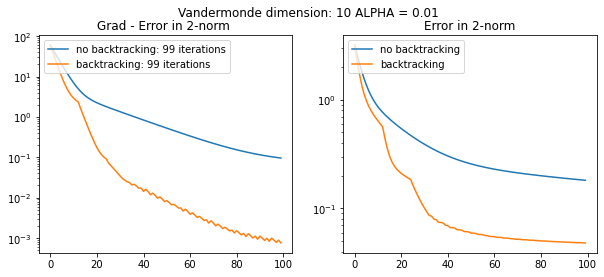

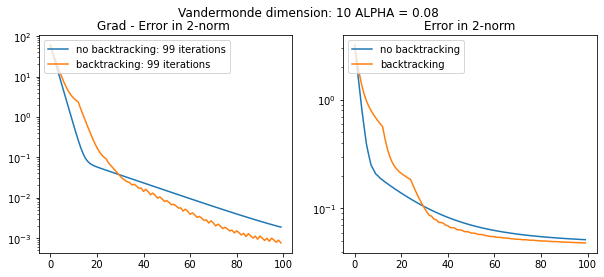

Lambda:  0.4


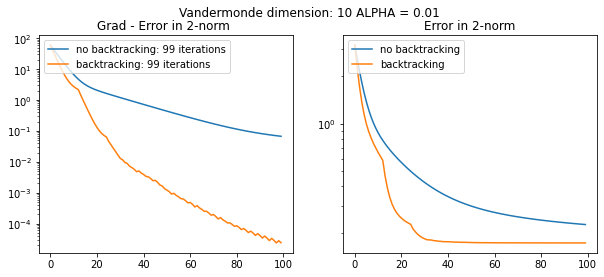

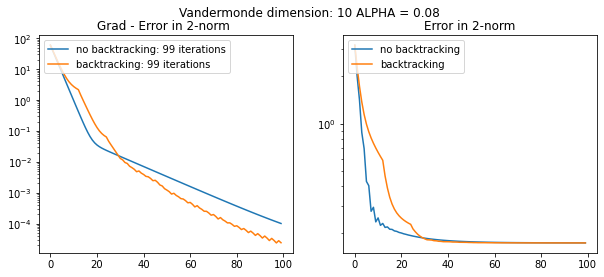

Lambda:  0.9


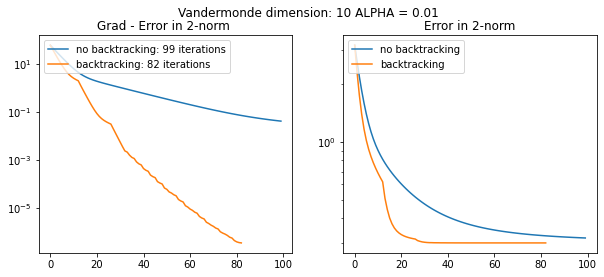

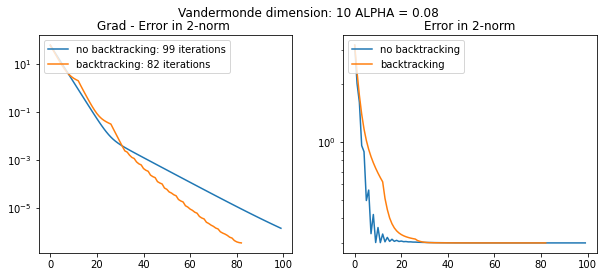

In [16]:
#%% Function 4
Lambda =  0.05

n=10 #vandermonde dim
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true


def f4(x):
    return f3(x) + 0.5*Lambda*(x.T @ x)


def grad_f4(x):
    return grad_f3(x) + Lambda * x

# Lambda = 0.05

print('Lambda: ', Lambda)
plot_err(f4, grad_f4, n, x_true, 0.01)
plot_err(f4, grad_f4, n, x_true, 0.08)


## lambda = 0.4
Lambda =  0.4

print('Lambda: ', Lambda)
plot_err(f4, grad_f4, n, x_true, 0.01)
plot_err(f4, grad_f4, n, x_true, 0.08)


## lambda = 0.9
Lambda =  0.9

print('Lambda: ', Lambda)
plot_err(f4, grad_f4, n, x_true, 0.01)
plot_err(f4, grad_f4, n, x_true, 0.08)


*** 
In this case, the solution is moved from the $x_{true}=[1..1]$ to a solution closer to $0$: this happens because of the regularizer $\|\|^2$ and the regularization parameter. Bigger the parameter, larger the difference with respect to $x_{true}$. This parameter is added to increase the gradient descent convergence rate: we can say that it somehow compensate the flattened regions. Adding the proper regularization parameter (=0.9) we can even reache the solution in less than 100 iterations. Changing the dimension of the Vandermonde matrix (we won't show its error plots) just makes the convergence worse, as we've seen in the previous example.
***

***
If we choose $\alpha$ too small, then we slowly proceed to the solution, requiring a big amount of time to get the solution or reaching the maximum iteration limit far from the desired result. From the other hand, choosing $\alpha$ too big can cause a never-ending swing around the exact solution. There isn't a one-shot solution for the problem of the choice of $\alpha$, it just depends on the problem 
***

$$ $$
- For each of the functions above, run the GD method with and without the backtracking, trying different values for the step size $\alpha >0$ when you are not using **backtracking**. Observe the different behavior of GD. $$ $$
- To help visualization, it is convenient to plot the error vector that contains the $\|\nabla f(x_k)\|_2$, to check that it goes to zero. Compare the convergence speed (in terms of the number of iterations $k$) in the different cases. $$ $$
- For each of the points above, fix $x_0=(0,0,...,0)^T$,$k_{max}=100$, while choose your values for $tolf$ and $tolx$. It is recommendend to also plot the error $\|x_k-x^*\|_2$ varying $k$ when the true $x^*$ is available. $$ $$
- *Hard (optional):* For the functions 1 and 2, plot the contour around the minimum and the path defined by the iterations (following the example seen during the lesson). See plt.contour to do that.